In [1]:
# %matplotlib qt5
# importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os, glob

In [2]:
all_files = glob.glob("class_*.csv")
df_from_each_file = (pd.read_csv(f, sep=',') for f in all_files)
df_merged   = pd.concat(df_from_each_file, ignore_index=True)
df_merged.to_csv("dataset.csv")

(60840, 14)
Class
2    10080
4    10080
0     9360
1     9360
3     9360
5     9360
6     3240
Name: count, dtype: int64
[0 1 2 3 4 5 6]


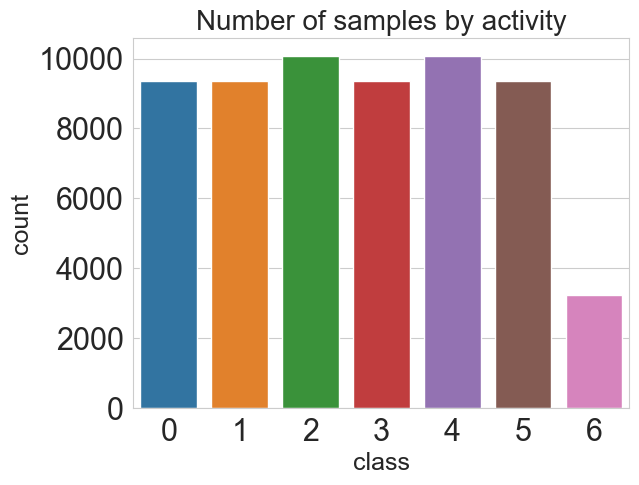

In [3]:
df = pd.read_csv("dataset.csv")

# removing null values
df = df_merged.dropna()
print(df.shape)
sns.set_style('whitegrid')

sns.countplot(x = 'Class', data = df)
plt.title('Number of samples by activity',fontsize=20)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel('class',fontsize=18)
plt.ylabel('count',fontsize=18)

print(df['Class'].value_counts())
print(df['Class'].unique())

# scale the data
df[['AccX1', 'AccY1', 'AccZ1', 'AccX2', 'AccY2', 'AccZ2']] = (df[['AccX1', 'AccY1', 'AccZ1', 'AccX2', 'AccY2', 'AccZ2']]/16384.0).round(decimals = 6)
df[['GyroX1', 'GyroY1', 'GyroZ1', 'GyroX2', 'GyroY2', 'GyroZ2']] = (df[['GyroX1', 'GyroY1', 'GyroZ1', 'GyroX2', 'GyroY2', 'GyroZ2']]/131.0).round(decimals = 6)
df[['time']] = df[['time']]/1000
df.to_csv('dataset_scaled.csv')

In [2]:
df = pd.read_csv("dataset.csv")
# scale the data
df[['AccX1', 'AccY1', 'AccZ1', 'AccX2', 'AccY2', 'AccZ2']] = (df[['AccX1', 'AccY1', 'AccZ1', 'AccX2', 'AccY2', 'AccZ2']]/16384.0).round(decimals = 6)
df[['GyroX1', 'GyroY1', 'GyroZ1', 'GyroX2', 'GyroY2', 'GyroZ2']] = (df[['GyroX1', 'GyroY1', 'GyroZ1', 'GyroX2', 'GyroY2', 'GyroZ2']]/131.0).round(decimals = 6)
df[['time']] = df[['time']]/1000
df.to_csv('dataset_scaled.csv')

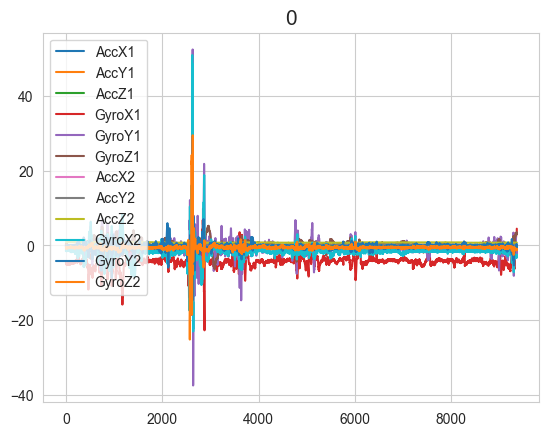

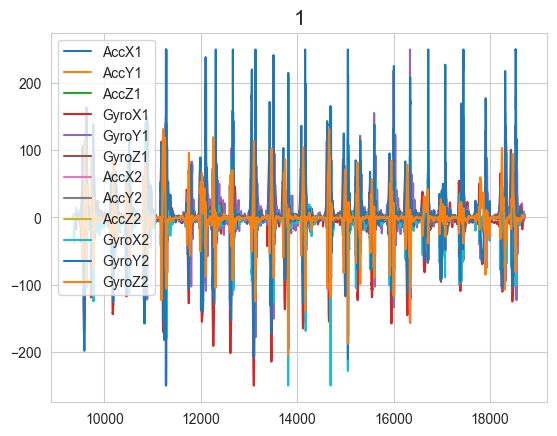

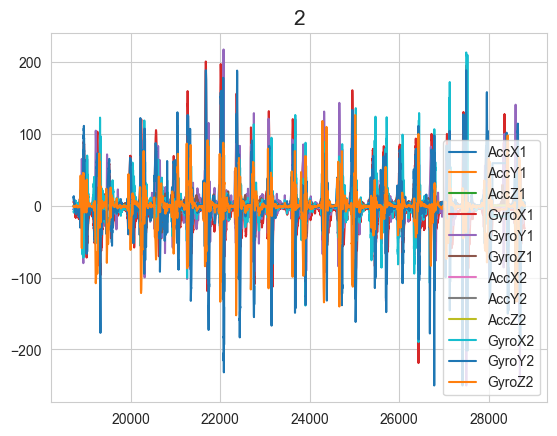

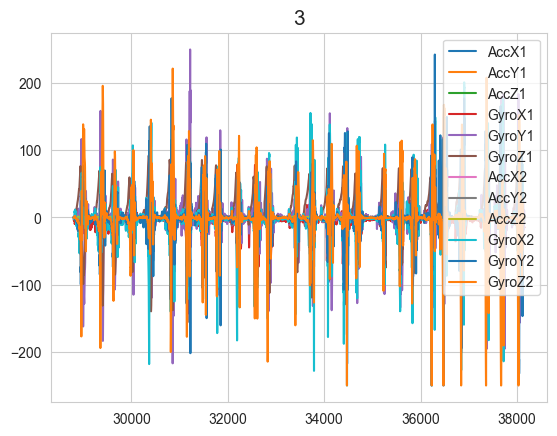

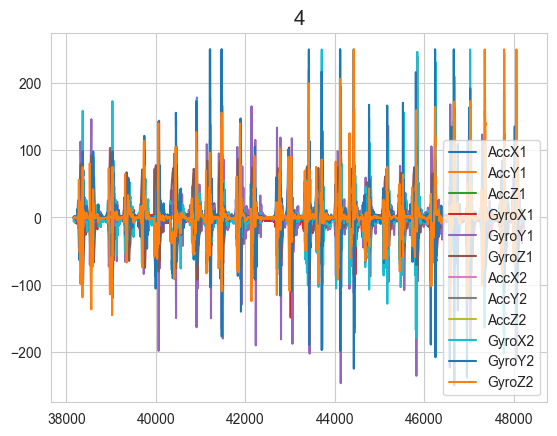

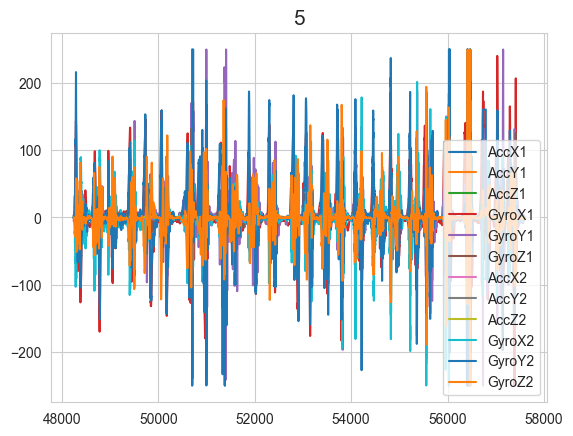

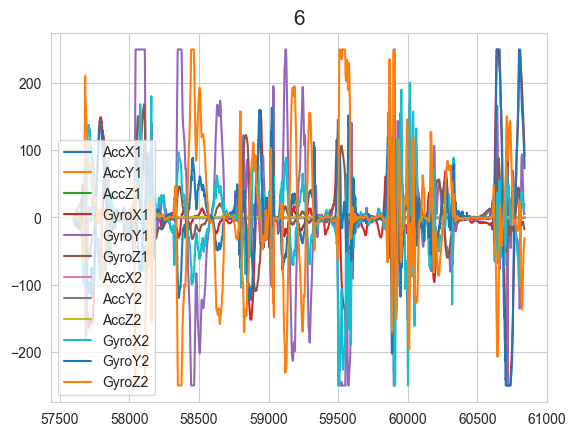

In [5]:
b = df['Class'].unique()
# print(b)
for i in b:
    df_plt = df[(df['Class'] == i)]
    plt.plot(df_plt.drop(['time', 'Class'], axis= 1))
    plt.legend(df_plt.drop(['time', 'Class'], axis= 1))
    plt.title(i, fontsize = 15)
    plt.show()

In [6]:
df = pd.read_csv("dataset_scaled.csv")
Acc1_data = df[['time', 'AccX1', 'AccY1', 'AccZ1', 'Class']]
Acc2_data = df[['time', 'AccX2', 'AccY2', 'AccZ2', 'Class']]
Gyr1_data = df[['time', 'GyroX1', 'GyroY1', 'GyroZ1', 'Class']]
Gyr2_data = df[['time', 'GyroX2', 'GyroY2', 'GyroZ2', 'Class']]

# write the dataframes to output CSV files
Acc1_data.to_csv('Acc1_data.csv', index=False)
Acc2_data.to_csv('Acc2_data.csv', index=False)
Gyr1_data.to_csv('Gyr1_data.csv', index=False)
Gyr2_data.to_csv('Gyr2_data.csv', index=False)

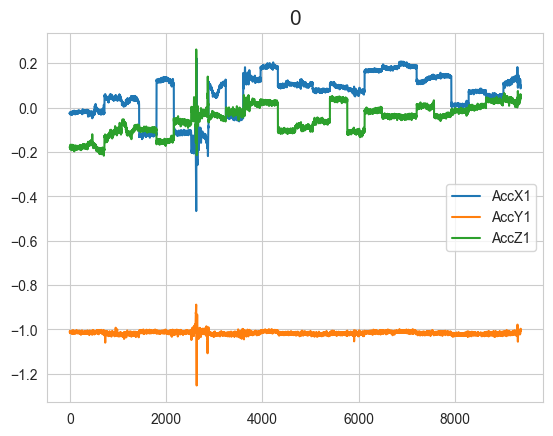

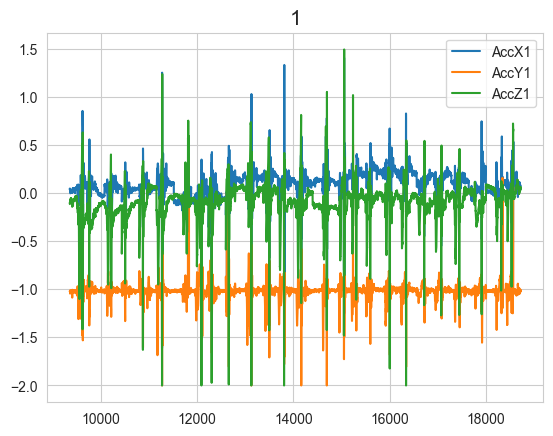

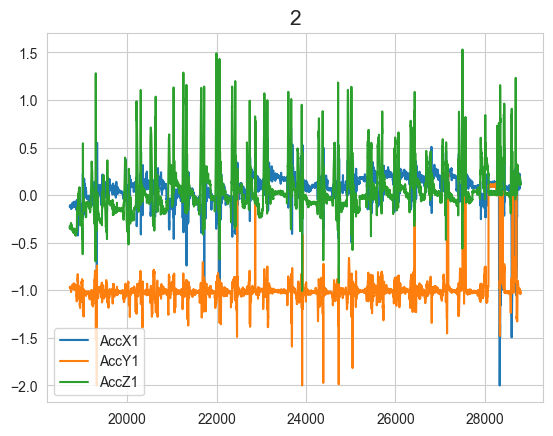

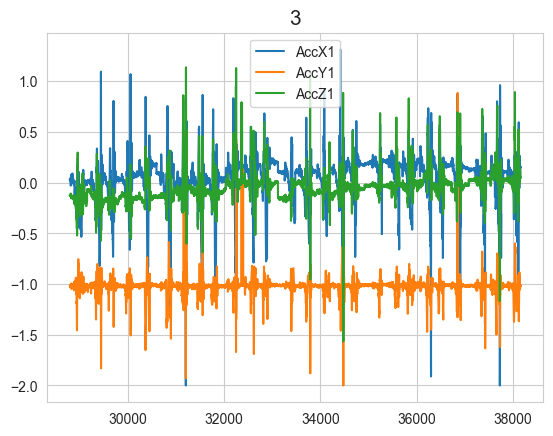

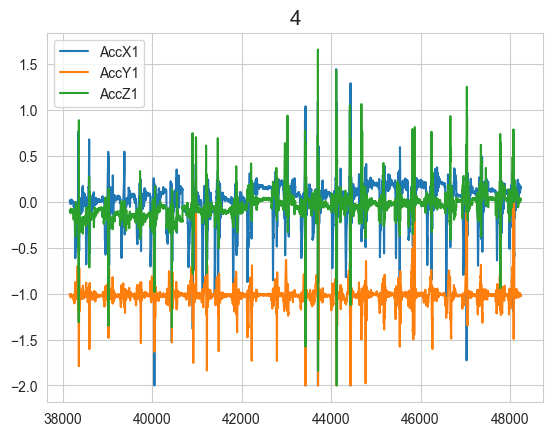

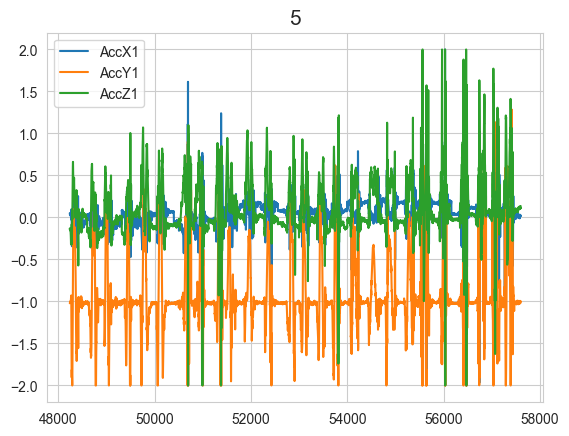

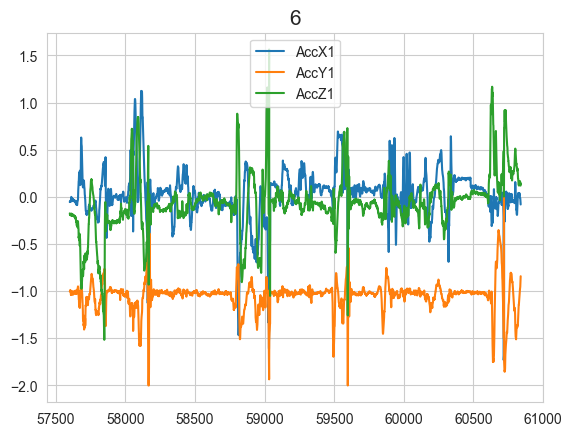

In [7]:
df_ACC1 = pd.read_csv("Acc1_data.csv")
b = df_ACC1['Class'].unique()
# print(b)
for i in b:
    df_plt = df_ACC1[(df_ACC1['Class'] == i)]
    plt.plot(df_plt.drop(['time', 'Class'], axis= 1))
    plt.legend(df_plt.drop(['time', 'Class'], axis= 1))
    plt.title(i, fontsize = 15)
    plt.show()

In [2]:
# specify the input CSV file path
base = 'class_0_.csv'
forward = 'class_1_.csv'
backward = 'class_2_.csv'
left = 'class_3_.csv'
right = 'class_4_.csv'
jump = 'class_5_.csv'

# read the first 360 rows of the input file into a pandas dataframe
df_0 = pd.read_csv(base, nrows=360)
df_1 = pd.read_csv(forward, nrows=360)
df_2 = pd.read_csv(backward, nrows=360)
df_3 = pd.read_csv(left, nrows=360)
df_4 = pd.read_csv(right, nrows=360)
df_5 = pd.read_csv(jump, nrows=360)

accel_base = df_0[['AccX1', 'AccY1', 'AccZ1']]
df_1 = df_1[['time', 'AccX1', 'AccY1', 'AccZ1', 'Class']]
df_2 = df_2[['time', 'AccX1', 'AccY1', 'AccZ1', 'Class']]
df_3 = df_3[['time', 'AccX1', 'AccY1', 'AccZ1', 'Class']]
df_4 = df_4[['time', 'AccX1', 'AccY1', 'AccZ1', 'Class']]
df_5 = df_5[['time', 'AccX1', 'AccY1', 'AccZ1', 'Class']]

df_1[['AccX1', 'AccY1', 'AccZ1']] = (df_1[['AccX1', 'AccY1', 'AccZ1']] - accel_base)/16384.0
df_2[['AccX1', 'AccY1', 'AccZ1']] = (df_2[['AccX1', 'AccY1', 'AccZ1']] - accel_base)/16384.0
df_3[['AccX1', 'AccY1', 'AccZ1']] = (df_3[['AccX1', 'AccY1', 'AccZ1']] - accel_base)/16384.0
df_4[['AccX1', 'AccY1', 'AccZ1']] = (df_4[['AccX1', 'AccY1', 'AccZ1']] - accel_base)/16384.0
df_5[['AccX1', 'AccY1', 'AccZ1']] = (df_5[['AccX1', 'AccY1', 'AccZ1']] - accel_base)/16384.0

print(df_1,df_2)

     time     AccX1     AccY1     AccZ1  Class
0       1  0.066162 -0.007324  0.075684      1
1       7  0.064697 -0.012451  0.070312      1
2      13  0.062744 -0.008301  0.066406      1
3      19  0.074463 -0.015381  0.068359      1
4      25  0.060059 -0.013184  0.067383      1
..    ...       ...       ...       ...    ...
355  2135  0.097168 -0.009766 -0.029541      1
356  2141  0.112793 -0.000244 -0.041016      1
357  2146  0.112793  0.008057 -0.058350      1
358  2153  0.125000  0.008057 -0.061035      1
359  2158  0.127441  0.016357 -0.065918      1

[360 rows x 5 columns]      time     AccX1     AccY1     AccZ1  Class
0       1 -0.093994  0.049072 -0.167725      2
1       6 -0.088867  0.048584 -0.160645      2
2      12 -0.093750  0.042236 -0.160889      2
3      17 -0.084229  0.029297 -0.141113      2
4      22 -0.101562  0.041260 -0.173096      2
..    ...       ...       ...       ...    ...
355  2179  0.080078 -0.006104  0.068359      2
356  2184  0.078613 -0.005127  0.051

In [2]:
df_1 = pd.read_csv('May/third_week/X_mpu1_norm.csv')
df_2 = pd.read_csv('May/third_week/X_mpu1.csv')

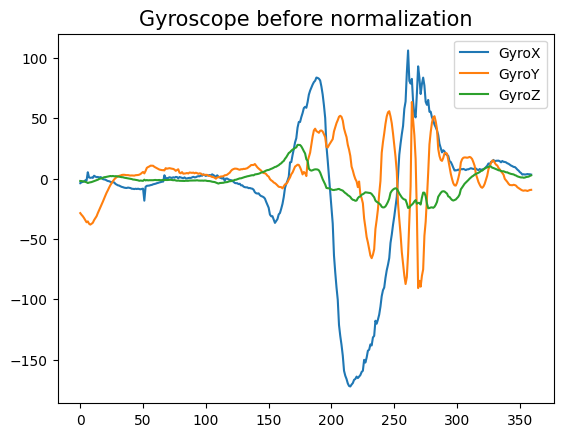

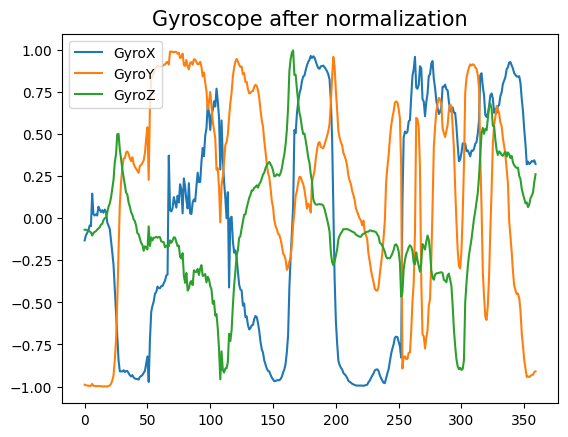

In [12]:

# print(b)
plt.plot(df_2.index, df_2['GyroX'], label='GyroX')
plt.plot(df_2.index, df_2['GyroY'], label='GyroY')
plt.plot(df_2.index, df_2['GyroZ'], label='GyroZ')
plt.legend()
plt.title('Gyroscope before normalization', fontsize=15)
plt.savefig('May/third_week/plot_GYR.png')
plt.show()
    
# print(b)
plt.plot(df_1.index, df_1['GyroX'], label='GyroX')
plt.plot(df_1.index, df_1['GyroY'], label='GyroY')
plt.plot(df_1.index, df_1['GyroZ'], label='GyroZ')
plt.legend()
plt.title('Gyroscope after normalization', fontsize=15)
plt.savefig('May/third_week/plot_GYR_nor.png')
plt.show()


In [ ]:
fun = [df_1, df_2, df_3, df_4]
for i, f in enumerate(fun):
    plt.plot(f.index, f['AccX'], label='AccX')
    plt.plot(f.index, f['AccY'], label='AccY')
    plt.plot(f.index, f['AccZ'], label='AccZ')
    plt.legend()
    plt.title(i+1, fontsize=15)
    #plt.savefig('plot_'+str(i+1)+'.png')
    plt.show()

In [16]:
df_1[['AccX', 'AccY', 'AccZ','GyroX', 'GyroY', 'GyroZ']].value_counts(normalize=True)

AccX       AccY       AccZ       GyroX      GyroY      GyroZ    
-0.460284  -0.882109  -0.100115   0.844945  -0.519212  -0.128400    0.002778
 0.052332  -0.996867  -0.059310  -0.777813   0.582882   0.235064    0.002778
 0.051033  -0.997750  -0.043473  -0.506281   0.862120   0.020720    0.002778
 0.050925  -0.992342  -0.112534  -0.968560  -0.012411   0.248470    0.002778
 0.050649  -0.997295  -0.053266   0.000000   0.683819  -0.729652    0.002778
                                                                      ...   
 0.020231  -0.998216  -0.056170  -0.909307   0.077354   0.408872    0.002778
 0.019566  -0.997870  -0.062234  -0.931871   0.362235   0.020071    0.002778
 0.019380  -0.997963  -0.060773  -0.902793   0.354711   0.243197    0.002778
 0.019301  -0.989084  -0.146083  -0.994322  -0.042676  -0.097480    0.002778
 0.459907  -0.885393   0.067568   0.903108   0.288516  -0.318048    0.002778
Name: proportion, Length: 360, dtype: float64

In [11]:
print(df_1['AccY'])
segment = df_1['AccY'][1:360]
hist, _ = np.histogram(segment, bins='auto')
print(hist,sum(hist))

0       -0.994365
1       -0.993487
2       -0.992850
3       -0.992908
4       -0.993586
           ...   
80275   -0.925599
80276   -0.924097
80277   -0.914242
80278   -0.923832
80279   -0.918632
Name: AccY, Length: 80280, dtype: float64
[193  19  31  32  19  12   2   7   5   4   3   4   4   2   0   0   0   1
   2   1   0   1   1   0   0   1   2   0   1   0   1   0   1   1   1   0
   1   1   0   1   1   0   2   2] 359


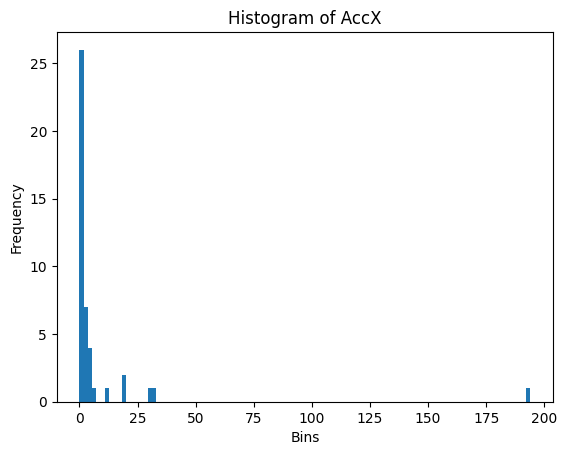

In [47]:
# Plot the histogram
plt.hist(hist, bins='auto')

# Add labels and title
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.title('Histogram of AccX')

# Display the plot
plt.show()

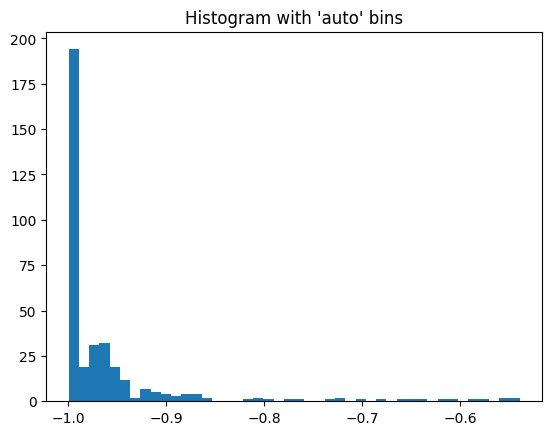

In [37]:
_ = plt.hist(df_1['AccY'], bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

In [43]:
np.arange(0,1)

array([0.1])

In [46]:
from scipy.stats import entropy
columns = ['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ']
segments = [df_1[column][i:i+360] for column in columns for i in range(0, len(df_1), 360)]
print(segments[224])

360   -0.990091
361   -0.983446
362   -0.982157
363   -0.981475
364   -0.981163
         ...   
715   -0.995114
716   -0.995432
717   -0.995073
718   -0.994595
719   -0.994067
Name: AccY, Length: 360, dtype: float64


In [34]:
for segment in segments:
    segment = np.nan_to_num(segment)
    hist, _ = np.histogram(segment, bins='auto')

In [35]:
def calculate_entropy(segment):
    # Compute the probability distribution
    #probabilities = segment.value_counts(normalize=True)
    segment = np.nan_to_num(segment)
    hist, _ = np.histogram(segment, bins='auto')
    probabilities = hist / len(segment)
    # Calculate entropy using the probabilities
    ent = entropy(probabilities, base=2)  # Set the base to 2 for binary entropy
    return ent

In [36]:
entropy_values = []
for segment in segments:
    ent = calculate_entropy(segment)
    entropy_values.append(ent)

In [39]:
print(len(entropy_values)/6, df_1.shape[0]/360)

223.0 223.0


In [45]:
entropy_values[223*2:223*3]

[3.2407999556052256,
 3.023631968052201,
 4.027231899537521,
 3.3180582383624606,
 3.0315509728785917,
 3.327980044094363,
 3.7731712152825785,
 3.55735982977933,
 4.0485505871062015,
 3.8240715459787444,
 4.17301776582387,
 4.234869701766962,
 3.9411268921448324,
 3.637048666808538,
 4.365407201666757,
 4.473156852517027,
 4.233035229233038,
 3.9735040093510445,
 4.114472005878526,
 3.966623802203404,
 3.808877154005821,
 3.609320824342002,
 3.410759976683064,
 3.0832872958260142,
 2.9730124768268795,
 3.9161523982283666,
 3.4179151863297292,
 3.610208804838447,
 3.689702311270506,
 3.68055394674996,
 2.856645024095551,
 3.3229545689127744,
 3.17756905812356,
 3.337333036120485,
 3.2089355667902772,
 3.232803077654084,
 2.733436271216191,
 2.937896383255699,
 3.75983995059608,
 3.6652760340417214,
 3.850472441939916,
 3.8343084659699898,
 4.064214063633322,
 4.056903525638398,
 2.933791831740123,
 3.5557480853464836,
 3.7493687535890676,
 3.888331421497412,
 3.6341036170162933,
 3.481